In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import koreanize_matplotlib
from tabulate import tabulate


In [2]:
# def LG_D():
url1='https://finance.naver.com/item/coinfo.naver?code=000660'
driver = webdriver.Chrome()  # 웹 드라이버 선택 (예: Chrome)
driver.get(url1)  # 접근할 웹 페이지의 URL 입력

driver.switch_to.frame("coinfo_cp") # iframe 내부로 전환

html = driver.page_source
soup =BeautifulSoup(html,'html.parser')
tbody_tag = soup.find_all('tbody')
tbody_tag


[<tbody><tr class="cmp-table-row">
 <td class="cmp-table-cell td0101">
 <dl>
 <dt>
 <span class="name">SK하이닉스</span>
 <a class="cEm" href="http://www.skhynix.com" target="comPage" title="[홈페이지] www.skhynix.com"><img align="absmiddle" hspace="3" src="/images/icon_home.gif"/></a>
 <a class="cEm" title="[대표전화] 031-5185-4114 
 [주식담당] 031-5185-4114"><img align="absmiddle" hspace="1" src="/images/icon_tel.gif"/></a>
 <b class="num">000660</b>
 </dt>
 <dt class="line-left">SK Hynix</dt>
 <dt class="line-left">KOSPI : 전기전자</dt>
 <dt class="line-left">WICS : 반도체와반도체장비</dt>
 </dl>
 </td>
 </tr>
 <tr class="cmp-table-row">
 <td class="cmp-table-cell td0201">
 <div> </div>
 </td>
 </tr>
 <tr class="cmp-table-row">
 <td class="cmp-table-cell td0301">
 <dl>
 <dt>EPS <b class="num">-6,336</b></dt>
 <dt class="line-left">BPS <b class="num">80,611</b></dt>
 <dt class="line-left">PER <b class="num">N/A</b></dt>
 <dt class="line-left">업종PER <b class="num">42.26</b></dt>
 <dt class="line-left">PBR <b clas

In [3]:
text_data = tbody_tag[17].text
text_data

'\n2021(A)\n429,978\n34.79\n124,103\n96,023\n13,190\n9.93\n1.45\n16.84\n4.59\n16.85\nIFRS연결\n2022(A)\n446,216\n3.78\n68,094\n22,296\n3,063\n24.49\n0.82\n3.56\n3.48\n29.04\nIFRS연결\n2023(A)\n327,657\n-26.57\n-77,303\n-91,124\n-12,517\nN/A\n1.82\n-15.61\n21.30\n44.07\nIFRS연결\n2024(E)\n678,700\n107.14\n240,869\n169,934\n23,342\n8.00\n1.84\n27.58\n3.97\n17.86\nIFRS연결\n2025(E)\n894,040\n31.73\n366,668\n266,838\n36,654\n5.09\n1.34\n32.26\n2.56\n-6.31\nIFRS연결\n\n'

In [4]:
# 정규식으로 데이터 쪼개기
item_list = []
remove_span = re.split(r'\n|\n', text_data)
for word in remove_span:
    if word !='':
        item_list.append(word)

item_list

['2021(A)',
 '429,978',
 '34.79',
 '124,103',
 '96,023',
 '13,190',
 '9.93',
 '1.45',
 '16.84',
 '4.59',
 '16.85',
 'IFRS연결',
 '2022(A)',
 '446,216',
 '3.78',
 '68,094',
 '22,296',
 '3,063',
 '24.49',
 '0.82',
 '3.56',
 '3.48',
 '29.04',
 'IFRS연결',
 '2023(A)',
 '327,657',
 '-26.57',
 '-77,303',
 '-91,124',
 '-12,517',
 'N/A',
 '1.82',
 '-15.61',
 '21.30',
 '44.07',
 'IFRS연결',
 '2024(E)',
 '678,700',
 '107.14',
 '240,869',
 '169,934',
 '23,342',
 '8.00',
 '1.84',
 '27.58',
 '3.97',
 '17.86',
 'IFRS연결',
 '2025(E)',
 '894,040',
 '31.73',
 '366,668',
 '266,838',
 '36,654',
 '5.09',
 '1.34',
 '32.26',
 '2.56',
 '-6.31',
 'IFRS연결']

In [7]:
# value_dict 만들기
value_dict = {'영업이익':[item_list[3],item_list[15],item_list[27]],
              'PER':[item_list[6],item_list[18],item_list[30]],
              'PBR':[item_list[7],item_list[19],item_list[31]],
              'ROE':[item_list[8],item_list[20],item_list[21]]}
value_dict


{'영업이익': ['124,103', '68,094', '-77,303'],
 'PER': ['9.93', '24.49', 'N/A'],
 'PBR': ['1.45', '0.82', '1.82'],
 'ROE': ['16.84', '3.56', '3.48']}

In [8]:
value_DF=pd.DataFrame(value_dict,index=['2021','2022','2023'])
value_DF= value_DF.replace(to_replace='N/A', value=0)
# N/A값 >> 영업이익이 마이너스이기에 na값으로 둔다는걸로 추정
value_DF

,영업이익,PER,PBR,ROE
2021,"124,103",9.93,1.45,16.84
2022,"68,094",24.49,0.82,3.56
2023,"-77,303",0,1.82,3.48


In [9]:
value_DF['영업이익'] = value_DF['영업이익'].str.replace(',', '')

In [10]:
value_DF = value_DF.astype(float)

In [11]:
value_DF

,영업이익,PER,PBR,ROE
2021,124103.0,9.93,1.45,16.84
2022,68094.0,24.49,0.82,3.56
2023,-77303.0,0.00,1.82,3.48


In [12]:
for i in value_DF.columns:
    print(value_DF[f'{i}'])

2021    124103.0
2022     68094.0
2023    -77303.0
Name: 영업이익, dtype: float64
2021     9.93
2022    24.49
2023     0.00
Name: PER, dtype: float64
2021    1.45
2022    0.82
2023    1.82
Name: PBR, dtype: float64
2021    16.84
2022     3.56
2023     3.48
Name: ROE, dtype: float64


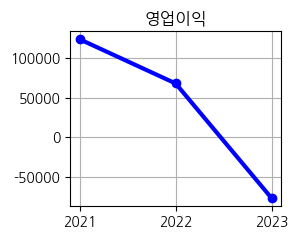

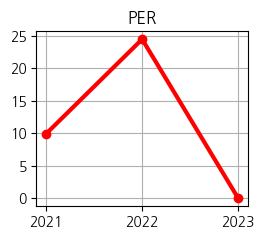

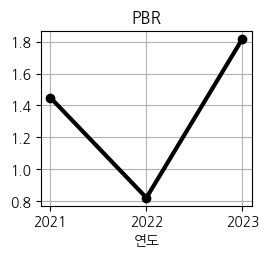

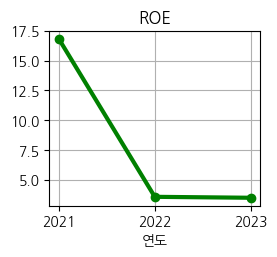

In [13]:
j=1
color=['blue', 'red', 'black', 'green']
for i in value_DF.columns:
    plt.figure(figsize=(6,5))
    plt.subplot(2,2,j)
    plt.plot(value_DF[f'{i}'], marker='o',color=color[j-1],linewidth=3)
    j +=1
    # 그래프 설정
    plt.title(f'{i}')
    if j>3:
        plt.xlabel('연도')
    plt.grid(True)

    # 그래프 출력
    plt.show()
